# Blending and pasting images

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img1=cv2.imread("images\lotus.jpg")
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2= cv2.imread("images\water.jpg")
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

# Blending images of same size using addWeighted()

In [3]:
img1.shape

(427, 640, 3)

In [4]:
img2.shape

(183, 275, 3)

In [5]:
img1_cpy = img1
img2_cpy = img2

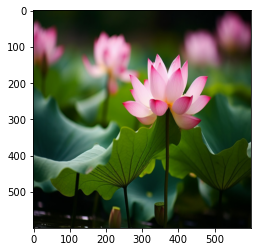

In [6]:
img1_cpy = cv2.resize(img1_cpy,(600,600))
plt.imshow(img1_cpy)

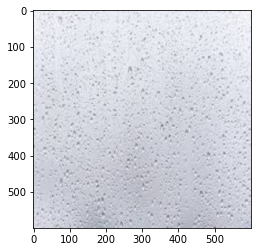

In [7]:
img2_cpy = cv2.resize(img2_cpy,(600,600))
plt.imshow(img2_cpy)

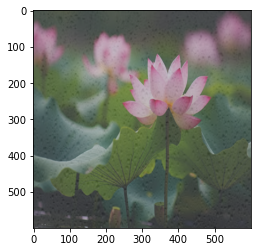

In [8]:
blended_image=cv2.addWeighted(src1=img1_cpy,alpha=0.5,src2=img2_cpy,beta=0.3,gamma=0)
plt.imshow(blended_image)


# Overlapping small image on big image
Just by assigning the pixels of bigger image with smaller image

In [9]:
img1=cv2.imread("images\lotus.jpg")
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2= cv2.imread("images\water.jpg")
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [10]:
img1.shape

(427, 640, 3)

In [11]:
img2.shape

(183, 275, 3)

In [12]:
large_img = img1
small_img = img2

In [13]:
x_start=0
y_start=0
x_end = x_start+small_img.shape[1] #numpy reads width of image as colums
y_end = y_start+small_img.shape[0] #numpy reads height of image as rows


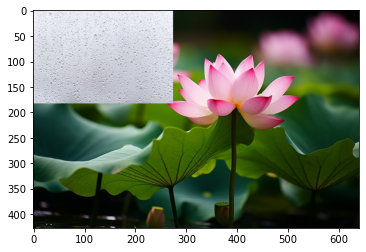

In [14]:
large_img[y_start:y_end,x_start:x_end] = small_img
plt.imshow(large_img)

# Blending different sized images with mask

In [15]:
img1 = cv2.imread("images\island.jpg")
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img1 = cv2.resize(img1,(1200,800))
img2 = cv2.imread("images\sun.jpg")
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)


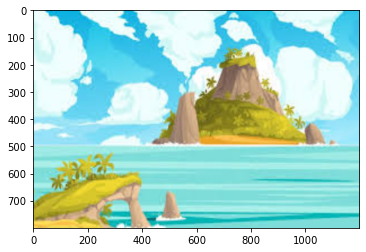

In [16]:
plt.imshow(img1)

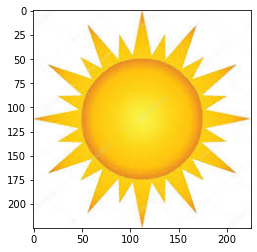

In [17]:
plt.imshow(img2)

In [18]:
img1.shape

(800, 1200, 3)

In [19]:
img2.shape

(225, 225, 3)

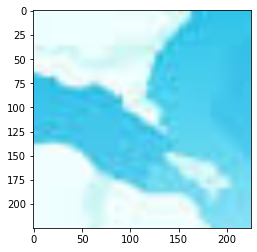

In [20]:
y_start = 0
x_start = 1200 - 225

roi = img1[0:225,x_start:1200] # Region of interest
plt.imshow(roi)

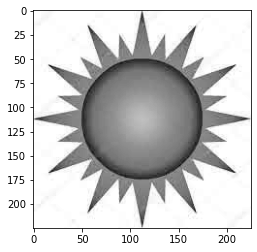

In [21]:
img2_gray = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)
plt.imshow(img2_gray,cmap="gray")

In [22]:
img2_gray.shape

(225, 225)

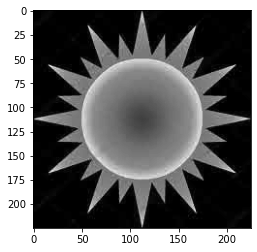

In [23]:
mask_inv = cv2.bitwise_not(img2_gray)
plt.imshow(mask_inv,cmap="gray")

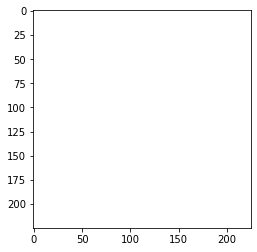

In [24]:
white_bg = np.full(img2.shape,255)
plt.imshow(white_bg)

In [25]:
bg = cv2.bitwise_or(white_bg,white_bg,mask=mask_inv)
bg.shape

(225, 225, 3)

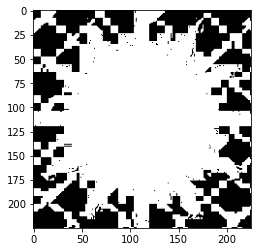

In [26]:
plt.imshow(bg)

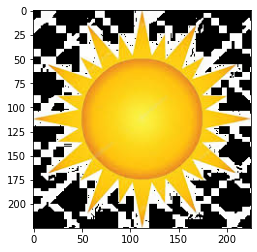

In [27]:
fg = cv2.bitwise_or(img2,img2,mask=mask_inv)
plt.imshow(fg)

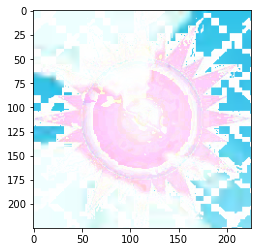

In [28]:
final_roi = cv2.bitwise_or(roi,fg)
plt.imshow(final_roi)

In [31]:
final_roi.shape

(225, 225, 3)

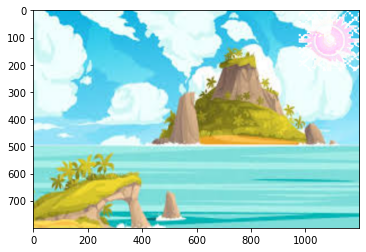

In [35]:
img1.shape
img1[0:225,x_start:1200] = final_roi
plt.imshow(img1)